In [2]:
#Imports 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import math
import cv2 #Load Images 
import os  #For files and folder management 
from tqdm import tqdm #to trace iterations during model training

# loading images

In [3]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git #data

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 37.12 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [4]:
#get list of files' full paths using os model
cat_folder = '/content/dog-cat-full-dataset/data/train/cats'
dog_folder = '/content/dog-cat-full-dataset/data/train/dogs'

cat_files=[cat_folder+"/"+i for i in os.listdir(cat_folder)]
dog_files=[dog_folder+"/"+i for i in os.listdir(dog_folder)]
print (cat_files)

['/content/dog-cat-full-dataset/data/train/cats/cat.9722.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.590.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.5165.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.7453.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.907.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.2909.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.2944.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.7347.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.4623.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.12072.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.4954.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.7527.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.8930.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.11274.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.5241.jpg', '/content/dog-cat-full-dataset/data/train/cats/cat.1241.jpg', '/conte

# Labeled dataset

In [5]:
cat_labeled=[[0,i]for i in cat_files] 
dog_labeled=[[1,i]for i in dog_files]
labeled_data=cat_labeled+ dog_labeled

random.shuffle(labeled_data)

# Data Pipelines With Generator

In [59]:
def DataPipeLine(data,batch_size=48,width=64, height=64):
  #flaten photos into 1d array 
  imgs_arr=[]
  labels=[]
  img_paths=[]
  dim = (width, height)
  batch_n=int((len(data))/batch_size)
  for d in range(batch_n):
    # imgs_arr =np.array([cv2.imread(j).flatten() for [i,j] in data[d*batch_size:(batch_size*(d+1))+1]]) #read the img change it into 1d arr
    
    labels   =np.array([ i for [i,j] in data[d*batch_size:(batch_size*(d+1))]]).reshape(batch_size,1)
    #read the img change it into 1d arr and resize it devided by 255 for normalization
    imgs_arr =np.array([ (( cv2.resize(cv2.imread(j),dim).flatten() )/255.0) for [i,j] in data[d*batch_size:(batch_size*(d+1))]])
    
    # the path of each img will use it for showing results when testing 
    img_paths=np.array([ j for [i,j] in data[d*batch_size:(batch_size*(d+1))]]).reshape(batch_size,1)
    yield imgs_arr,labels, img_paths



# Logistic Regression loss function

In [7]:
#Log Loss
def CostFunction (Predictions,GroundTruth): 
  n=len(GroundTruth)
  log_loss =(-1/n)*np.sum( (GroundTruth* np.log(Predictions)) +( (1-GroundTruth)*np.log(1-Predictions) ))
  return log_loss




# Optimization Gradient Descent 

In [8]:
#activation function to map predections into 1 and zero probability  
def sigmoid(predections):
  A = 1/(1+np.exp(-predections))
  
  for i,elem in enumerate(A):
    if (elem <= 1.01086754e-02 ): A[i][0] = 1.01086754e-02
    elif (elem == 1): A[i][0] = 0.99 

  assert A.dtype == np.float64
  return A

In [9]:
def GradientDescent(labeled_data,iterations,batch_size=48,width=64, height=64):
  w = np.full_like(np.arange(height*width*3), 0, dtype=np.float).reshape(((height*width*3),1))
  w0= np.zeros((batch_size,1))
  # print (w0.shape,w.shape)
  batch_n = int(len(labeled_data)/batch_size)
  cost_li = []
  for i in tqdm (range(iterations)):
    img=DataPipeLine(labeled_data)
    for ii in range(batch_n):
      x,GroundTruth,_=next(img)
      predictions=sigmoid((np.dot(x,w)+w0))
      #derivative for optmaization 
      d_w0= predictions-GroundTruth
      d_w = np.dot(x.T,(predictions-GroundTruth))
      #updating weights
      w0 = w0-(0.001)*(1/batch_size)*d_w0
      w  = w -(0.001)*(1/batch_size)*d_w
      cost_li.append(CostFunction(predictions,GroundTruth))
    print ("average patch loss is ",sum(cost_li)/batch_n,"\n")
  return w0 , w , cost_li 

In [11]:
w0 , w , cost_li=GradientDescent(labeled_data,50)


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()
  2%|▏         | 1/50 [01:49<1:29:15, 109.30s/it]

average patch loss is  0.6848234544474623 



  4%|▍         | 2/50 [03:38<1:27:23, 109.24s/it]

average patch loss is  0.6741099997201713 



  6%|▌         | 3/50 [05:27<1:25:33, 109.22s/it]

average patch loss is  0.6694187932942329 



  8%|▊         | 4/50 [07:16<1:23:43, 109.20s/it]

average patch loss is  0.6663626482920524 



 10%|█         | 5/50 [09:05<1:21:50, 109.12s/it]

average patch loss is  0.6640263957248014 



 12%|█▏        | 6/50 [10:54<1:19:56, 109.02s/it]

average patch loss is  0.6620730157677628 



 14%|█▍        | 7/50 [12:43<1:18:05, 108.97s/it]

average patch loss is  0.6603517073306381 



 16%|█▌        | 8/50 [14:32<1:16:15, 108.93s/it]

average patch loss is  0.6587869411115084 



 18%|█▊        | 9/50 [16:21<1:14:24, 108.90s/it]

average patch loss is  0.6573375722661228 



 20%|██        | 10/50 [18:09<1:12:34, 108.86s/it]

average patch loss is  0.6559794270424211 



 22%|██▏       | 11/50 [19:58<1:10:47, 108.90s/it]

average patch loss is  0.6546972058673874 



 24%|██▍       | 12/50 [21:47<1:08:56, 108.86s/it]

average patch loss is  0.6534804903781166 



 26%|██▌       | 13/50 [23:36<1:07:06, 108.82s/it]

average patch loss is  0.6523216860712971 



 28%|██▊       | 14/50 [25:25<1:05:19, 108.88s/it]

average patch loss is  0.651214922533302 



 30%|███       | 15/50 [27:14<1:03:32, 108.94s/it]

average patch loss is  0.6501554446326554 



 32%|███▏      | 16/50 [29:03<1:01:43, 108.94s/it]

average patch loss is  0.6491392628636282 



 34%|███▍      | 17/50 [30:52<59:56, 108.99s/it]  

average patch loss is  0.6481629441202592 



 36%|███▌      | 18/50 [32:41<58:06, 108.96s/it]

average patch loss is  0.6472234806003951 



 38%|███▊      | 19/50 [34:30<56:18, 108.97s/it]

average patch loss is  0.6463182034474882 



 40%|████      | 20/50 [36:19<54:28, 108.96s/it]

average patch loss is  0.6454447228658377 



 42%|████▏     | 21/50 [38:08<52:38, 108.91s/it]

average patch loss is  0.6446008845046728 



 44%|████▍     | 22/50 [39:56<50:48, 108.86s/it]

average patch loss is  0.6437847362721539 



 46%|████▌     | 23/50 [41:45<48:59, 108.87s/it]

average patch loss is  0.6429945021447968 



 48%|████▊     | 24/50 [43:34<47:12, 108.93s/it]

average patch loss is  0.6422285608863054 



 50%|█████     | 25/50 [45:24<45:24, 108.97s/it]

average patch loss is  0.6414854283617907 



 52%|█████▏    | 26/50 [47:13<43:37, 109.06s/it]

average patch loss is  0.640763742586144 



 54%|█████▍    | 27/50 [49:02<41:48, 109.06s/it]

average patch loss is  0.6400622509183873 



 56%|█████▌    | 28/50 [50:51<39:58, 109.04s/it]

average patch loss is  0.6393797989839176 



 58%|█████▊    | 29/50 [52:40<38:10, 109.08s/it]

average patch loss is  0.6387153210162737 



 60%|██████    | 30/50 [54:29<36:21, 109.08s/it]

average patch loss is  0.6380678313835558 



 62%|██████▏   | 31/50 [56:18<34:32, 109.08s/it]

average patch loss is  0.637436417115655 



 64%|██████▍   | 32/50 [58:07<32:41, 108.98s/it]

average patch loss is  0.636820231285227 



 66%|██████▌   | 33/50 [59:56<30:52, 108.97s/it]

average patch loss is  0.6362184871226363 



 68%|██████▊   | 34/50 [1:01:45<29:04, 109.02s/it]

average patch loss is  0.6356304527659505 



 70%|███████   | 35/50 [1:03:34<27:16, 109.09s/it]

average patch loss is  0.6350554465633762 



 72%|███████▏  | 36/50 [1:05:23<25:27, 109.11s/it]

average patch loss is  0.6344928328584801 



 74%|███████▍  | 37/50 [1:07:13<23:38, 109.12s/it]

average patch loss is  0.6339420329253845 



 76%|███████▌  | 38/50 [1:09:02<21:49, 109.12s/it]

average patch loss is  0.6334024826583421 



 78%|███████▊  | 39/50 [1:10:51<19:59, 109.09s/it]

average patch loss is  0.6328736554141121 



 80%|████████  | 40/50 [1:12:40<18:10, 109.08s/it]

average patch loss is  0.632355065610417 



 82%|████████▏ | 41/50 [1:14:29<16:21, 109.06s/it]

average patch loss is  0.6318462578254898 



 84%|████████▍ | 42/50 [1:16:18<14:32, 109.03s/it]

average patch loss is  0.6313468046405253 



 86%|████████▌ | 43/50 [1:18:07<12:43, 109.07s/it]

average patch loss is  0.6308563045630677 



 88%|████████▊ | 44/50 [1:19:56<10:54, 109.05s/it]

average patch loss is  0.6303743801210876 



 90%|█████████ | 45/50 [1:21:45<09:05, 109.01s/it]

average patch loss is  0.6299006761200001 



 92%|█████████▏| 46/50 [1:23:34<07:16, 109.00s/it]

average patch loss is  0.6294348580477288 



 94%|█████████▍| 47/50 [1:25:23<05:27, 109.00s/it]

average patch loss is  0.6289766106134734 



 96%|█████████▌| 48/50 [1:27:12<03:38, 109.01s/it]

average patch loss is  0.6285256364072579 



 98%|█████████▊| 49/50 [1:29:01<01:48, 108.97s/it]

average patch loss is  0.628081654668741 



100%|██████████| 50/50 [1:30:50<00:00, 109.00s/it]

average patch loss is  0.6276444001550071 



In [44]:
plt.plot(cost_li)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss plot")

416


# model testing 

In [15]:
#loading test files
#get list of files' full paths using os model
test_cat_folder = '/content/dog-cat-full-dataset/data/test/cats'
test_dog_folder = '/content/dog-cat-full-dataset/data/test/dogs'

test_cat_files=[test_cat_folder+"/"+i for i in os.listdir(test_cat_folder)]
test_dog_files=[test_dog_folder+"/"+i for i in os.listdir(test_dog_folder)]

test_cat_labeled=[[0,i]for i in test_cat_files] 
test_dog_labeled=[[1,i]for i in test_dog_files]
test_labeled_data=test_cat_labeled+ test_dog_labeled

random.shuffle(test_labeled_data)

# classification function

In [77]:
def ClassificationFunc(w,w0,test_labeled_data,batch_size=50):
  batch_n = int(len(test_labeled_data)/batch_size)
  img=DataPipeLine(test_labeled_data,batch_size=batch_size)

  output_dict = {
      "DOG": {
          "img": [],
          "prediction": []
          },
      "CAT":  {
          "img": [],
          "prediction": []
          }
  }
  for i in range(batch_n):
    
    x,GroundTruth,img_paths=next(img)
    prediction=sigmoid((np.dot(x,w)))
    #cat => 0 , dog => 1
    output_dict["CAT"]["img"] = [j for j in img_paths if  GroundTruth[ np.where(img_paths==j) ] == 0 ]
    output_dict["DOG"]["img"] = [j for j in img_paths if  GroundTruth[ np.where(img_paths==j) ] == 1 ]
 
    output_dict["CAT"]["prediction"] = [j for j in prediction if  GroundTruth[ np.where(prediction==j) ] == 0 ]
    output_dict["DOG"]["prediction"] = [j for j in prediction if  GroundTruth[np.where(prediction==j)] == 1 ]

  return output_dict
  
  

In [79]:
output_dict=ClassificationFunc(w,w0,test_labeled_data)

# Random batch of Model Results 

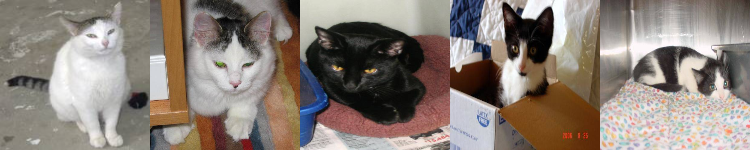

[0.2309436600968602, 0.2733415295659029, 0.15891594897263597, 0.29249614692314163, 0.2814886321251558]
*****************************************************************************


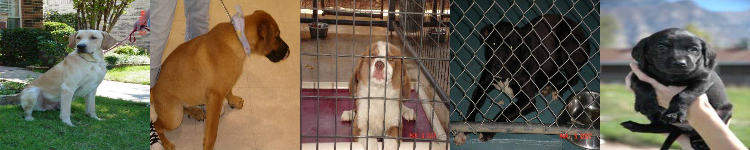

[0.6058636836606889, 0.621234497135967, 0.47913406679248083, 0.47634852882463413, 0.4790207470403618]


In [97]:
# concatanate image Horizontally

Hori = np.concatenate(tuple([ cv2.resize(cv2.imread(i[0]),(150,150)) for i in output_dict["CAT"]["img"][:5] ]), axis=1)
cv2_imshow(Hori)
print( [i[0] for i in (output_dict["CAT"]["prediction"][:5])] )
print("*****************************************************************************")
Hori = np.concatenate(tuple([ cv2.resize(cv2.imread(i[0]),(150,150)) for i in output_dict["DOG"]["img"][:5] ]), axis=1)
cv2_imshow(Hori)
print( [i[0] for i in (output_dict["DOG"]["prediction"][5:10])] )

# Model Accuracy

In [115]:
  cat_right_predictions=  len([i for i in output_dict["CAT"]["prediction"] if i [0]<0.5])
  dog_right_predictions=  len([i for i in output_dict["DOG"]["prediction"] if i [0]>0.5])
  cat_accuracy= cat_right_predictions /len(output_dict["CAT"]["img"])
  dog_accuracy= dog_right_predictions /len(output_dict["DOG"]["img"])
  model_accuracy= (cat_right_predictions+dog_right_predictions)/(len(output_dict["CAT"]["img"])+len(output_dict["DOG"]["img"]))
  print ( " model accuracy in cat classification is ",cat_accuracy ,"model accuracy in dog classification is ",dog_accuracy,"\n","over all accuracy is ", model_accuracy )


 model accuracy in cat classification is  0.9047619047619048 model accuracy in dog classification is  0.41379310344827586 
 over all accuracy is  0.62
